<a href="https://colab.research.google.com/github/Pedrovalad/Pedro_Valadares_DS/blob/main/Projeto_Linguistica_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linguística Computacional

Este projeto passa por vários pontos importantes para o campo da **Linguística Computacional**, em especial do processamento de linguagem natural.

Aqui foram desenvolvidas e implementadas diferentes técnicas e ferramentas. Dentre elas, podemos citar:

- Limpeza de corpus, com identificação e exclusão de stop words, desenvolvimento de um stemmer e de um concordanciador.

- Análise estatística do corpus e etiquetagem morfossitática.

- Avaliação de relevância de expressões no corpus:
  - TF (Frequência de Termo)
  - IDF (Frequência Inversa de Documentos)
  - TF-IDF (Frequência de termo-Frequência Inversa)

- Implementação de modelos probalísticos de linguagens (N-Gramas e Cadeias de Markov)

- Criação de um previsor de palavras baseado em N-Gramas

- Implementação de um Classificador Bayesiano Ingênuo (*Naive Bayes() para detecção de spams.

As soluções e análises do projeto foram desenvolvidas utilizando principalmente as bibliotecas NLTK e spaCy.

# Técnicas quantitativas de análise de texto.

Nesse primeira parte, vamos explorar o potencial de técnicas quantitativas de análise de texto para avaliação e análise de corpus.

Primeira etapa: fazer o download do texto Ubirajara, de José de Alencar, no site no Projeto Gutenberg (aqui [texto do link](https://www.gutenberg.org/cache/epub/38496/pg38496.txt))

Ao salvar o arquivo, verificar os seguintes pontos:

1) Qual é a codificação dos caracteres?

2) Existe algo como um cabeçalho, notas de rodapé ou de fim, informações editorias, etc?

3) Qual o tamanho do arquivo?

In [1]:
#Criar função para ler o arquivo txt

def ler (nome_arq):
  arquivo = open(nome_arq, 'r', encoding='utf-8')
  conteudo_arq = arquivo.read()
  arquivo.close()
  return conteudo_arq

In [2]:
#Ler o arquivo e contar os caracteres

texto = ler('/content/drive/MyDrive/Ubirajara.txt')
print(len(texto))

219835


# Concordanciador

Uma forma interessante de utilizar a variável 'texto' que acabamos de criar é realizar buscas por expressões no conteúdo e apresentar o contexto onde elas se encontram.

Uma forma de fazer isso é por meio de um concordanciador. Na linguística de corpus, os concordanciadores são utilizados para listar as ocorrências de uma determinada palavra ou frase, a qual fica centralizada, com uma quantidade definida de contextos, tanto da esquerda como da direita, fornecendo uma visualização privilegiada do item.

In [3]:
#Criar um concordanciador

def concordanciador (alvo, texto):
  texto = texto.replace('\n', ' ')
  texto = texto.replace('\t', ' ')
# essa primeira parte tem o objetivo de eliminar quebras de linha (\n) e tabulações (\t) para não atrapalhar a disposição visual do texto
  ocorrencias = list()
  encontrado_aqui = texto.find(alvo,0)

  while encontrado_aqui > 0:
    pos_inicial = encontrado_aqui - (40-len(alvo)//2)
    ocorrencias.append(texto[pos_inicial: pos_inicial + 80])
    encontrado_aqui = texto.find(alvo, encontrado_aqui +1)
  return ocorrencias


In [4]:
# Testar o concordanciador

resultados = concordanciador('serpente',texto)
for i in resultados:
  print(i)



e, Jaguarê não te quer matar como a serpente que ataca o descuidado caçador. Dez
reiro invencivel que tem por arma a serpente. Reconhece o teu vencedor, Pojucan,
zes ella escapou-lhe da mão, como a serpente das garras do gavião.  «Mais uma ve
reiro terrivel que tem por arma uma serpente.»         *       *       *       *
«Agora eu queria ter no coração uma serpente para morder aquella que me roubou o
 porque elle tem os olhos da grande serpente de fogo, que vôa como o raio de Tup
uerreiros ferozes, filhos da grande serpente do mar.  Um dia esses guerreiros sa
la, muito cheiroza, a qual a grande serpente creava no bucho.  Os Tupinambás faz
 na tromba. Elle fujia, esticando a serpente; e a serpente encolhendo-se o arras
le fujia, esticando a serpente; e a serpente encolhendo-se o arrastava até á bei
 pelo meio.  O velho tapir rompeu a serpente como se rompe uma corda de piassaba
 a liberdade. Ella tem a astucia da serpente e seu veneno.  --Eu era a cobra d'a
to.  Vem depois Arariboia, a

In [5]:
# Verificar a quantidade de ocorrências da palavra "serpente" no texto

len(resultados)

15

# Limpeza do corpus

A primeira etapa é separar o corpus em palavras. Em linguística computacional, a forma de isolar palavras é baseada simplesmente nos espaços em branco. Ou sejo, uma palavra é um conjunto de caracteres entre dois espaços.

Apesar de ser um método relativamente eficiente e rápido de decompor o corpus, ele pode acarretar alguns problemas.

Um deles é a questão da pontuação. Ao dividir palavras por espaços em branco, determinados vocábulos acabarão incorporando os sinais de pontuação. Afinal, não há espaços entre esses sinais e os termos que os antecedem.

Outro ponto que deve ser observado é a conversão de todos os caracteres para minúsculas para permitir, por exemplo, a buscas por expressões idênticas ('Casa' e 'casa').

Além disso, essa conversão facilita a ordenação das palavras, pois a maioria dos métodos tende a posicionar as letras maiúsculas primeiro.

In [6]:
# Dividir a string de todo conteúdo de um arquivo de texto em palavras separadas por espaço

palavras = texto.split()

In [7]:
# Tratar palavras que incorporam marcas de pontuação e colocar palavras em minúscula

def limpar(lista):
  lixo = '.,:;?!"`()[]\/|#$%^&*'
  return[x.strip(lixo).lower() for x in lista]



In [8]:
# Testar a função com corpus ficticio

corpus_sujo = ['banana;', 'maçã', 'abaca.te', ':Melancia']
print(limpar(corpus_sujo))

['banana', 'maçã', 'abaca.te', 'melancia']


Note que a função resolve a questão dos sinais de pontuação incorporados no início e no fim das palavras. Contudo, o método strip() não é capaz de remover as pontuações que aparecem no meio dos vocábulos.

Para solucionar esse problema, iremos utilizar o método isalpha(), que permite filtrar as strings que não sejam compostas exclusivamente de letras.

Aqui teremos outro entrave, pois o método irá eliminar números e também palavras hifenizadas. Para lidar com isso, criaremos uma dupla filtragem.

In [9]:
# Ajustar a função 'limpar' para incorporar o método isalpha()
def limpar(lista):
  lixo = '.,:;?!"`()[]\/|#$%^&*'
  quase_limpo = [x.strip(lixo).lower() for x in lista]
  return [x for x in quase_limpo if x.isalpha() or '-' in x]

In [10]:
# Testar a nova função

corpus_sujo = ['banana;', 'maçã', 'abaca.te', ':Melancia', 'cuide-se']
print(limpar(corpus_sujo))

['banana', 'maçã', 'melancia', 'cuide-se']


In [11]:
# Aplicar a função 'limpar' ao texto Ubirajara e verificar a quantidade de palavras

# len(palavras) antes da aplicação da função: 37139

palavras = limpar(palavras)
len(palavras)

palavras_limpas = 37139 - len(palavras)
print("A limpeza inicial do corpus eliminou", palavras_limpas, "termos.")


A limpeza inicial do corpus eliminou 1120 termos.


# Contagem de palavras

A análise quantitativa, por meio de contagens sobre unidades do corpus, oferece uma descrição rápida e concisa de uma série de características do corpus.

Isso pode ser muito valioso para fins de estudos linguísticos e estilísticos.

Por meio dessa análise computacional, podemos verificar por exemplo:

1) Vocabulário e riqueza lexical
2) Classificação de palavras por ocorrência
3) Hápax legômena


In [12]:
# Verificar vocabulário do texto e criar uma lista de palavras (sem repetição)

vocabulario = set(palavras)
len(vocabulario)

6945

In [13]:
# Calcular a riqueza lexical do corpus (nº de palavras distintas – types – dividido pelo número total de palavras– tokens)

riqueza = len(vocabulario)/len(palavras)
riqueza

0.19281490324550932

In [14]:
# Classificar palavras por ocorrência

def ocorrencias(lista_palavras):
  dicionario = defaultdict(int)
  for p in lista_palavras:
    dicionario[p]+=1
  return dicionario



In [15]:
# Organizar o dicionário pelo número de ocorrências (pelo valor, não pelas chaves)

from collections import defaultdict
dic = ocorrencias(palavras)
mf = sorted(dic.items(), key = lambda tupla:tupla[1],
              reverse=True)[:10]
for palavra, n in mf:
 print(palavra, '\t', n)

a 	 1473
o 	 1378
de 	 1199
que 	 1118
e 	 918
do 	 685
da 	 624
os 	 490
para 	 346
não 	 335


Os termos mais recorrentes do texto tem uma característica em comum: são palavras funcionais.

Isso quer dizer que são palavras de reduzida contribuição semântica ou nocional, que servem prioritariamente para estabelecer relações entre outros vocábulos.

As preposições, as conjuções, alguns pronomes e advérbios são exemplos desse tipo de termo.

Ao se analisar esse tipo de palavras, não é possível ter qualquer ideia acerca do assunto central do texto.

Por conta dessa baixa contribuição semântica, é comum que esses termos sejam excluídos dos corpus em análises computacionais relacionadas ao significado.

No campo do processamento de linguagem natural (PLN), as palavras funcionais são chamadas de palavras vazias. Em geral, elas serão descartadas antes de passar para outras análises.

A biblioteca NLTK traz uma lista de 203 palavras vazias (stop words) em português, que podem servir como um primeiro parâmetro para limpeza do corpus.

In [16]:
# Gerar lista de palavras vazias
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
vazias = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
# Mapear as palavras mais frequentes do texto Ubirajara que não aparecem na lista de vazias

frequentes_plenas = [x for x in mf if x[0].lower() not in vazias]
len(frequentes_plenas)


0

In [18]:
# Ampliar a lista de palavras frequentes para 20

mf = sorted(dic.items(), key=lambda tupla:tupla[1], reverse=True)[:40]
for palavra, n in mf:
  print(palavra, '\t', n)

a 	 1473
o 	 1378
de 	 1199
que 	 1118
e 	 918
do 	 685
da 	 624
os 	 490
para 	 346
não 	 335
dos 	 327
se 	 290
as 	 265
como 	 243
guerreiro 	 235
um 	 229
seu 	 215
em 	 212
na 	 205
mais 	 205
é 	 197
sua 	 197
no 	 195
com 	 195
ao 	 190
the 	 187
á 	 186
chefe 	 172
guerreiros 	 169
uma 	 165
por 	 158
grande 	 154
elle 	 152
ubirajara 	 151
mas 	 140
nação 	 129
quando 	 123
of 	 122
das 	 115
era 	 113


In [19]:
# Mapear novamente as palavras mais frequentes do texto Ubirajara que não aparecem na lista de vazias

frequentes_plenas = [x for x in mf if x[0].lower() not in vazias]
frequentes_plenas

[('guerreiro', 235),
 ('the', 187),
 ('á', 186),
 ('chefe', 172),
 ('guerreiros', 169),
 ('grande', 154),
 ('elle', 152),
 ('ubirajara', 151),
 ('nação', 129),
 ('of', 122)]

# Hápax Legômena

Esse é o termo técnico utilizado para designar as palavras com uma única ocorrência no corpus sob análise.

Há diversos motivos para uma palavra aparecer somente uma vez: raridade do lexema, raridade da forma flexionada, neologia, erros de digitação, etc.

Uma das formas de lidar com hápax é reduzir as palavras às suas raízes morfológicas. Isso pode ser feito utilzando um **stemmer** – um programa para reduzir vocábulos a suas raízes.

In [20]:
# Calcular a quantidade hápax legômena

hapax = [x for x in palavras if palavras.count(x) == 1]
len(hapax)
#resultado: 4358 palavras são hápax

4358

In [21]:
# Criando um Stemmer

nltk.download('rslp')

stemmer = nltk.stem.RSLPStemmer()
raizes = [stemmer.stem(x) for x in set(palavras)]
hapax = [x for x in raizes if raizes.count(x) == 1]

# Conferindo a redução de hápax após o uso do stemmer

len(hapax)

# Houve uma redução de 1.148 palavras hápax ao se reduzir os vocábulos às suas raízes

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


3210

In [22]:
# Refazer a medida de riqueza vocabular pela divisão do conjunto de raízes distintas (types) pela contagem absoluta de ocorrências de raízes (tokens)

len(set(raizes))/len(raizes)

0.624622030237581

# Análise estatística de corpus

Para fazer esta análise estatística de corpus, usamos o corpus Machado do módulo NLTK.

Ele contém a obra integral do autor divida em função de uma categorização literária da produção (romance, crônica, poesia, tradução, etc.) e ordem cronológica ascendente.

In [23]:
from nltk.corpus import machado
nltk.download('machado')

[nltk_data] Downloading package machado to /root/nltk_data...


True

In [24]:
# Verificar a lista de textos disponíveis no corpus Machado

print(machado.readme())

Machado de Assis -- Obra Completa

http://machado.mec.gov.br/

Public Domain

Contents:

Romance

romance/marm01.txt: Ressurreição (1872)
romance/marm02.txt: A Mão e a Luva (1874)
romance/marm03.txt: Helena (1876)
romance/marm04.txt: Iaiá Garcia (1878)
romance/marm05.txt: Memórias Póstumas de Brás Cubas (1881)
romance/marm06.txt: Casa Velha (1885)
romance/marm07.txt: Quincas Borba (1891)
romance/marm08.txt: Dom Casmurro (1899)
romance/marm09.txt: Esaú e Jacó (1904)
romance/marm10.txt: Memorial de Aires (1908)

Poesia

poesia/maps01.txt: Crisálidas (1864)
poesia/maps02.txt: Falenas (1870)
poesia/maps03.txt: Americanas (1875)
poesia/maps04.txt: Gazeta de Holanda (1886-88)
poesia/maps05.txt: Ocidentais (1901)
poesia/maps06.txt: O Almada (1908)
poesia/maps07.txt: Dispersas (1854-1939)

Contos

contos/macn001.txt: Contos Fluminenses (1870); Miss Dollar; Luís Soares; A mulher de preto; O segredo de Augusta; Confissões de uma viúva moça; Linha reta e linha curva; Frei Sim
contos/macn002.txt: 

In [25]:
#Importar a biblioteca Statistics para realizar as análises do corpus
import statistics

# Etiquetagem Morfossintática

Nessa análise do corpus Machado, iremos inicialmente calcular a frequência de uma determinada classe de palavras (no caso os advérbios) no total de palavras do texto.

Para fazer isso, teremos antes que realizar uma etiquetagem morfossintática (pos-tagging).

Nesse processo, são formadas tuplas com a palavra e sua etique correspondete. Por exemplo: ('são', 'VERB').

Para realizar essa ação, iremos usar a biblioteca spaCy.

In [26]:
!pip install spaCy -q

In [27]:
# Instalar o spaCy
!pip install spacy

# Baixar o modelo de linguagem 'pt_core_news_sm'
!python -m spacy download pt_core_news_sm

# Importar e carregar o modelo
import spacy
nlp = spacy.load('pt_core_news_sm')

# Exemplo de uso do spaCy
texto = "Será que vai funcionar essa etiquetagem?"
doc = nlp(texto)

# Imprimir os tokens e seus tipos
etiq = [(x.text, x.pos_) for x in doc]
print(etiq)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 26.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
[('Será', 'VERB'), ('que', 'SCONJ'), ('vai', 'AUX'), ('funcionar', 'VERB'), ('essa', 'DET'), ('etiquetagem', 'NOUN'), ('?', 'PUNCT')]


In [28]:
# Consultar etiquetagem de uma palavra específica por meio do índice
print(doc[0])
doc[0].pos_

#OBS: o nome do pos (part of speech) aparecerá sempre em inglês mesmo com as palavras da string em português


Será


'VERB'

**Adverbiação de Machado de Assis**

romance/marm01.txt
romance/marm02.txt
romance/marm03.txt
romance/marm04.txt
romance/marm05.txt
ROM Mean: 0.059228932420173935, ROM Std Dev: 0.0034634010945340512
CRO Mean: 0.05729973428035312, CRO Std Dev: 0


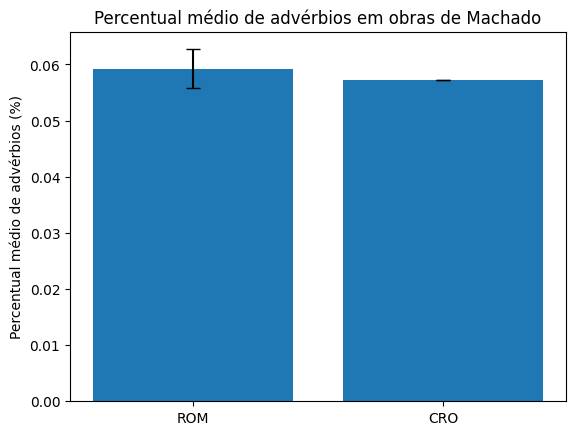

In [29]:
# Gerar gráfico de barras simples do tipo de texto de Machado de Assis

import matplotlib.pyplot as plt
import statistics as stat
import spacy
from nltk.corpus import machado

# Carregar o modelo do spaCy
nlp = spacy.load('pt_core_news_sm')

# Ler e ter acesso ao conteúdo de uma obra no corpus Machado
obras = ['romance/marm0' + str(i) + '.txt' for i in range(1, 6)]

# Contar advérbios
cont_adv = []
for obra in obras:
    print(obra)
    s = machado.raw(obra)
    doc = nlp(s)
    etiq = [(pal.orth_, pal.pos_) for pal in doc]
    adv = [(ort, pos) for (ort, pos) in etiq if pos == 'ADV']
    cont_adv.append(len(adv) / len(etiq))

# Verificar se há elementos suficientes antes de calcular a média e desvio padrão
rom_m, rom_dp, cro_m, cro_dp = None, None, None, None

if len(cont_adv) >= 4:
    rom_m = stat.mean(cont_adv[:4])
    if len(cont_adv[:4]) > 1:
        rom_dp = stat.stdev(cont_adv[:4])
    else:
        rom_dp = 0

if len(cont_adv) >= 5:
    cro_m = stat.mean(cont_adv[4:])
    if len(cont_adv[4:]) > 1:
        cro_dp = stat.stdev(cont_adv[4:])
    else:
        cro_dp = 0

# Imprimir os valores calculados
print(f"ROM Mean: {rom_m}, ROM Std Dev: {rom_dp}")
print(f"CRO Mean: {cro_m}, CRO Std Dev: {cro_dp}")

# Preparar dados para plotagem, assegurando que ambas as barras tenham marcas de desvio padrão
x = ['ROM', 'CRO']
y = []
dp = []
tipo_obra = []

if rom_m is not None:
    y.append(rom_m)
    dp.append(rom_dp)
    tipo_obra.append('ROM')

if cro_m is not None:
    y.append(cro_m)
    dp.append(cro_dp)
    tipo_obra.append('CRO')

# Verificar se dp tem pelo menos 2 valores e, se não, adicionar 0 para cro_dp
if len(dp) == 1:
    dp.append(0)

# Plotar o gráfico
plt.bar(tipo_obra, y, yerr=dp, capsize=5)
plt.ylabel('Percentual médio de advérbios (%)')
plt.title('Percentual médio de advérbios em obras de Machado')
plt.show()


No gráfico, as barras representam o percentual médio de advérbios nas obras de Machado. As marcas de desvio padrão (representadas pelas linhas verticais sobre as barras) indicam a variabilidade ou dispersão dos dados em torno da média.

Vamos interpretar os resultados:

ROM (Romances):

* Percentual Médio de Advérbios: Aproximadamente 0.059 (ou 5.9%).
* Desvio Padrão: Aproximadamente 0.0034 (ou 0.34%).
* Interpretação: A média de advérbios nos romances é de 5.9%, com uma pequena variação em torno dessa média, conforme indicado pelo desvio padrão pequeno.

CRO (Crônicas):

* Percentual Médio de Advérbios: Aproximadamente 0.057 (ou 5.7%).
* Desvio Padrão: 0.
* Interpretação: A média de advérbios nas crônicas é de 5.7%. O desvio padrão é 0, indicando que não há variação nos dados, ou seja, todas as crônicas analisadas têm exatamente o mesmo percentual de advérbios. Isso pode ser uma indicação de que a amostra de crônicas é muito pequena ou que as crônicas têm uma distribuição muito uniforme de advérbios.



In [30]:
# Eliminar categorias não desejadas para análise

lixo = ['PUNCT', 'SPACE', 'X', 'SYM', 'NUM']
pos2 = [pos for(pal, pos) in etiq if pos not in lixo]

# OBS: A lista completa de etiquetas atribuídias pelo spaCy encontra-se em https://spacy.io/usage/linguistic-features

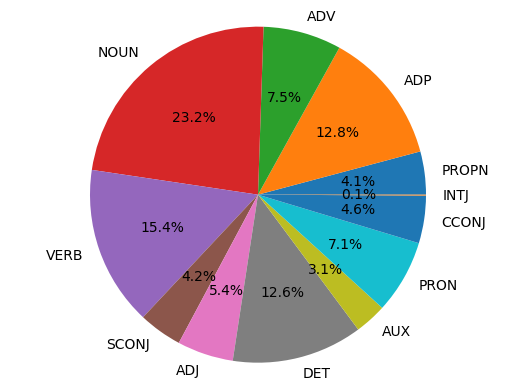

In [31]:
# Criar um dicionário de ocorrências para cada parte do discurso restante

cont = defaultdict(int)
for p in pos2:
  cont[p] +=1

nomes = cont.keys()
ocorrencias = cont.values()

# Gráfico de pizza com as ocorrências da parte do discurso na Crônica 5 do corpus do Machado de Assis

plt.pie(ocorrencias, labels = nomes, autopct= '%1.1f%%')
plt.axis('equal')
plt.show()

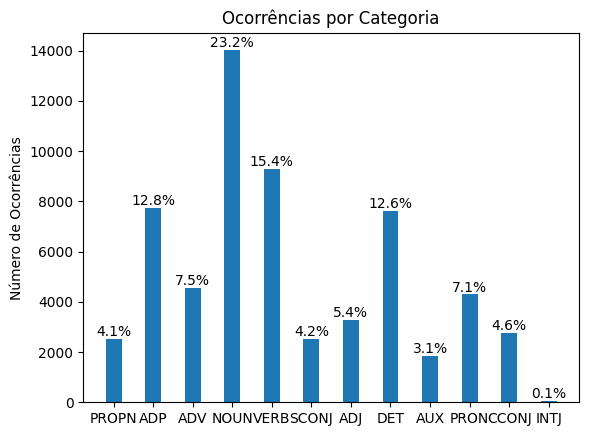

In [32]:
#Gráfico de barras com as ocorrências da parte do discurso na Crônica 5 do corpus do Machado de Assis

# Calcular o percentual de cada ocorrência
total = sum(ocorrencias)
percentuais = [f'{(ocorrencia / total) * 100:.1f}%' for ocorrencia in ocorrencias]

# Definir a largura das barras
largura_barras = 0.4  # Menor largura para aumentar o espaço entre as barras

# Gerar gráfico de barras
plt.bar(nomes, ocorrencias, width=largura_barras)
plt.ylabel('Número de Ocorrências')
plt.title('Ocorrências por Categoria')

# Adicionar os percentuais em cima das barras
for i, ocorrencia in enumerate(ocorrencias):
    plt.text(i, ocorrencia + 1, percentuais[i], ha='center', va='bottom')

# Exibir o gráfico
plt.show()


# Métodos para avaliação de relevância de expressões no corpus

Existem diferentes métodos para avaliar a relevância de expressões em determinado conjunto de texto.

Aqui vamos ver os seguintes:

* **Frequência do termo (TF)** – representa a divisão entre o nº de ocorrências de uma palavra pelo nº total de palavras de um texto.
* **Frequência inversa em documentos (IDF)** – indica que a relevância ou potencial informativo de uma palavra é inversamente proporcional à sua frequência num grande conjunto de documentos diferentes.
* **Combinação do TF e IDF (TF-IDF)**

In [33]:
#Implementação e exemplos de TF-IDF

# Criar uma coleção de documentos
obras = list()
for i in range(1,10):
  obras.append('romance/marm0' + str(i) + '.txt')

colecao = list()
for obra in obras:
  stringona = machado.raw(obra)
  palavras = limpar(stringona.lower().split())
  colecao.append(palavras)

In [34]:
# Funções para cálculo do TF-IDF

import math

def tf(termo, doc):
  return colecao[doc].count(termo) / len(colecao[doc])

def df(termo):
  return len([d for d in colecao if termo in d])

def idf(termo):
  return math.log10(len(colecao) / df(termo))

def tf_idf(termo, doc):
  return tf(termo, doc) * (idf(termo))

In [35]:
# Testar frequência de palavras em documentos

df('que')

# Esse resultado mostra que a palavra "que" está presente em 9 documentos

9

In [36]:
# Testar frequência de outra palavra

df('capitu')

# Esse resultado mostra que a palavra "capitu" está presente em apenas 1 documento

1

**Teste da função TF**

Essa função recebe dois argumentos, sendo que o segundo identifica o romance do corpus.

In [37]:
# Teste da função TF com o romance "Dom Casmuro"

tf('capitu', 7)


0.005223616893791578

In [38]:
# Teste da função TF com o romance "Dom Casmuro"

tf('que', 7)

0.041220482723655305

**Teste da função IDF com os mesmos termos anteirores**

O IDF é uma medida do potencial informativo das palavras, do quão significativas eles são para o texto como um todo.

In [39]:
idf('capitu')

0.9542425094393249

In [40]:
idf('que')

0.0

**Teste da função TF-IDF**

Identificar qual informativa é a palavra no contexto específico de cada documento.

In [41]:
tf_idf('capitu', 1)

0.0

In [42]:
tf_idf('capitu', 7)

0.004984597293081326

Note que, no Romance "Dom Casmurro" a palavra 'Capitu' possui potencial informativo. Contudo, em outro documento, a informatividade é nula.

In [43]:
#Listagem ordenada pela relevância de todas as palavras do romance "Dom Casmurro"

def mais_relevantes(doc):
  lista_total = [(tf_idf(p, doc), p) for p in set (colecao[doc])]

  return sorted(lista_total, reverse=True)[:50]

In [44]:
# Escolher o romance pelo número para chamar a função

mr = mais_relevantes(7)

In [45]:
#Lista das palavras mais relevantes, segundo TF-IDF, no romance "Dom Casmurro"

print(mr)

[(0.004984597293081326, 'capitu'), (0.0016126638301145468, 'escobar'), (0.0012021675824490257, 'seminário'), (0.0008063319150572734, 'justina'), (0.0008063319150572734, 'cosme'), (0.0007623501742359676, 'bentinho'), (0.0006157443714982816, 'pádua'), (0.0005424414701294385, 'sancha'), (0.0005017841062048455, 'ezequiel'), (0.0004544779884868268, 'cabral'), (0.0004398174082130582, 'prima'), (0.0004301573259668042, 'josé'), (0.0004251568279392896, 'agregado'), (0.000337193346296678, 'protonotário'), (0.0003078721857491408, 'manduca'), (0.0001878071651985378, 'padre'), (0.00017592696328522328, 'gurgel'), (0.00017592696328522328, 'fortunata'), (0.0001539360928745704, 'mata-cavalos'), (0.00014879655929669327, 'tio'), (0.00014660580273768607, 'seminarista'), (0.00014049954973735675, 'ressaca'), (0.00013194522246391747, 'ônibus'), (0.00013194522246391747, 'pregão'), (0.00012042818548916292, 'imitar'), (0.00011728464219014885, 'tocha'), (0.00011728464219014885, 'santiago'), (0.000105308700516970

In [46]:
# Exibir uma lista somente com as palavras, sem o valor TF-IDF

[p for v, p in mr]

['capitu',
 'escobar',
 'seminário',
 'justina',
 'cosme',
 'bentinho',
 'pádua',
 'sancha',
 'ezequiel',
 'cabral',
 'prima',
 'josé',
 'agregado',
 'protonotário',
 'manduca',
 'padre',
 'gurgel',
 'fortunata',
 'mata-cavalos',
 'tio',
 'seminarista',
 'ressaca',
 'ônibus',
 'pregão',
 'imitar',
 'tocha',
 'santiago',
 'você',
 'seminaristas',
 'libras',
 'apostólico',
 'santíssimo',
 'sanchinha',
 'pálio',
 'padre-nossos',
 'mônica',
 'enfiei',
 'administrador',
 'fiquei',
 'panegírico',
 'medicina',
 'soneto',
 'emoção',
 'embargos',
 'íamos',
 'óleos',
 'trombeta',
 'russos',
 'polêmica',
 'oblíqua']

Algumas informações interessantes desse grupo de palavras. A maior parte é composta por nomes próprios.

Isso é natural porque esses nomes são muito comuns em seu documento em relação ao restante da coleção.

Outro ponto interessante é que, enquanto o nome "Capitu" aparece na primeira posição, o nome "Bentinho" aparece somente na sexta. Isso indica que é de fato o personagem principal do livro.

In [47]:
# Calcular a relação entre a frequência do nome "Capitu" com o nome "Bentinho"

tf('capitu', 7)/ tf('bentinho', 7)

# O resultado mostra que o termo "Capitu" é seis vezes mais citado do que o nome "Bentinho"

6.538461538461538

In [48]:
# Calcular a relação entre a frequência do nome "Escobar" com o nome "Bentinho"

tf('escobar', 7)/ tf('bentinho', 7)

# Essa medida mostra talvez as razões dos ciúmes de Bentinho com relação a Escobar.

2.1153846153846154

# Modelos Probabilístico de Linguagens

Trata-se de modelos capazes de atribuir probilidades a sequências de elementos linguísticos em um certo nível de análise.

## Modelo N-Gramas

Por meio do modelo de n-grama, conseguimos capturar um certo aspecto sintagmático do corpus, relacionado a sequências de palavras adjacentes, baseando-nos em um certo tipo de probabilidade condicional.

De forma geral, podemos dizer que um n-grama é simplesmente uma sequência de 'n' elementos em determinado nível de análise (letras, morfemas, fonemas, etc.).

### Modelos de N-Gramas e Cadeias de Markov

Cadeias de Markov são processos aleatórios que permitem estimar um evento ou estado futuro com base somente no estado atual do processo, independentemente de seus estados passados.

Na análise de N-Gramas, a ideia central é que a ocorrência de uma palavra em uma sequência é condicionada somente pelas n-1 palavras que a antecendem imediatamente.

Nesse sentido, desprezam-se influências de palavras mais distantes. Isso é conhecido como **Assunção de Markov**.

Deve estar claro, entretanto, que, quanto menor o valor de 'n', menor o poder do modelo de capturar a relevância do contexto anterior para a escolha ou previsão de uma palavra.

Por exemplo, um modelo de unigramas é totalmente sensível ao contexto sentencial, refletindo apenas a chance de uma palavra ocorrer em um texto, independente de sua posição.

#### Implementação em Python

Na seção abaixo, vamos implementar um modelo de bigramas construído a partir de um corpus e aplicá-lo a uma tarefa de previsão de palavras.

In [49]:
# Como usaremos expressões regulares e dicionários default, precisaremos das bibliotecas "re" e "collections"

import re
from collections import defaultdict

# Ler o arquivo txt que usaremos na implementação do modelo

corpus_base = ler("/content/drive/MyDrive/corpus_bruto.txt")

# Transformar o corpus em uma lista de sentenças

# Vamos utilizar uma expressão regular (#) para substituir as pontuações mais frequentes e depois dividiremos as sentenças no (#).

corpus_pontuacao = re.sub(r'\.|\!|\?', '#', corpus_base)
sents = corpus_pontuacao.split('#')

As sentenças criadas anteriormente serão agora convertidas em listas de palavras, que são "limpas" posteriormente.

As strings receberão os marcadores de início (<s>) e final (</s>).

In [50]:
# Dividir sentenças em lista de palavras

sents = [['<s>'] + limpar(x.split()) + ['</s>'] for x in sents]

Agora, temos um novo formato para o corpus: sentenças limpas e com marcadores de início e fim. Vamos gravá-lo em um outro arquivo txt, chamado corpus_preparado.

In [51]:
c_p = open('corpus_preparado.txt', 'w', encoding = 'utf-8')

for sentença in sents:
  str = ' '.join(sentença)
  c_p.write(str+'\n')
c_p.close()

Em seguida, vamos dividir esse corpus preparado em dois corpora menores: um para treinamento, outro para testes.

Vamos reservar 80% dos dados para treinamento e 20% para testes, que é a proporção mais comumente utilizada pelos pesquisadores em linguística computacional.

Para isso, criaremos dois novos arquivos txt: corpus_treino e corpus_teste.

In [52]:
corpus_tt = open ('corpus_preparado.txt', 'r', encoding = 'utf-8')
c_tt = corpus_tt.readlines()
corpus_tt.close()

corte = int(len(c_tt) * 0.8) # 80% do tamanho
treino = c_tt[:corte]
teste = c_tt[corte:]

tr = open('corpus_treino.txt', 'w', encoding = 'utf-8')
for sent in treino:
  tr.write(sent)
tr.close()

ts = open('corpus_teste.txt', 'w', encoding= 'utf-8')
for sent in teste:
  ts.write(sent)
ts.close()

Passaremos agora para a construção do modelo, extraindo do corpus de treinamento o vocabulário e as contagens de ocorrências de seus itens.

In [118]:
corpus_treino = open('corpus_treino.txt', 'r', encoding='utf-8')
c_t = corpus_treino.readlines()
corpus_treino.close()

vocab = set()
contagem = defaultdict(int)
for linha in c_t:
  sent = linha.split()
  for palavra in sent:
    vocab |= {palavra}
    contagem[palavra] +=1

Faremos, agora, a filtragem dos hapáx legômena e sua substituição pela string "< DES >", representando palavras desconhecidas.

In [54]:
hapax = [palavra for palavra in contagem.keys() if contagem [palavra] == 1]
hapax = set(hapax)
novo_vocab =  vocab - hapax
novo_vocab |= {'<DES>'}

Estamos prontos para contar os unigramas e bigramas a partir do novo vocabulário e do novo corpus.

Vamos, primeiro, criar um extrator dos n-gramas de uma sentença.

In [55]:
def ngramas (n,sent):
  return [tuple(sent[i:i + n]) for i in range(len(sent)-n +1)]

Usamos a função "tuple()" para criar um objeto imutável. Isso é importante, porque usaremos essas sequências de palavras como chaves em dicionários de n-gramas.

In [56]:
# Testar a função "ngramas"

lista_str = 'parabéns pra você nesta data querida'.split()
ngramas(2, lista_str)

[('parabéns', 'pra'),
 ('pra', 'você'),
 ('você', 'nesta'),
 ('nesta', 'data'),
 ('data', 'querida')]

Em seguida, vamos criar dois dicionários, um para os unigramas e outro para os bigramas.

In [57]:
unigramas = defaultdict(int)
bigramas = defaultdict(int)

Agora, percorremos o corpus de treinamento, substituindo os hapáx legômena por "< DES >" e acrescentando os unigramas e bigramas, com suas respectivas contagens, aos dicionários correspondentes.

In [58]:
for linha in c_t:
  sent = linha.split()

  for i in range(len(sent)):
    if sent[i] in hapax:
      sent[i] = '<DES>'

  for x in ngramas (1,sent):
    unigramas[x] += 1

  for x in ngramas (2,sent):
    bigramas[x] += 1

Por fim, precisamos converter essas contagens em probabilidades.

Para isso, implantaremos a técnica de suavização de Laplace, adicionando 1 à contagem real de todos os n-gramas e V (tamanho do vocabulário) aos denominadores das respectivas frações.

In [59]:
def prob_uni(x):
  C = sum(unigramas.values())
  V = len(novo_vocab)
  return (unigramas[x] + 1)/ (c + V)

def prob_bi(x):
  V = len(novo_vocab)
  return (bigramas[x] + 1)/ (unigramas[(x[0],)] + V)

# Previsor de palavras

Vamos agora criar um previsor de palavras que se vale do modelo de bigramas para prever a próxima palavra a ser digitada em um texto em função da palavra imediatamente anterior.

In [60]:
def prever(palavra):
  lista = [ch for ch in bigramas.keys() if ch[0] == palavra]
  ordem = sorted(lista, key=lambda x:prob_bi(x), reverse = True)
  topo = ordem[0][1]
  return topo

#Teste do previsor de palavras

prever("o")

'gato'

# Implementação de um **classificador bayesiano ingênuo**

Um classificador é uma ferramenta que analisa dados (inputs) em determinada classe. Por exemplo, identifica se determinada mensagem é ou não um spam.

Um classificador bayesiano é aquele que é desenvolvido com base na Regra de Bayes, uma fórmula usada para atualizar a probabilidade de uma hipótese à medida que novas evidências são apresentadas. Ela nos ajuda a entender como as novas informações devem mudar nossa confiança em uma crença inicial.

Já um **classificador bayesiano ingênuo** é aquele que, ademais de ser basedada na Regra de Bayes, assume que todas as características (ou atributos) de um dado são independentes entre si, dada a classe. Apesar dessa suposição ser raramente verdadeira na prática, o classificador ainda funciona bem em muitos problemas práticos.

Vejamos abaixo como implementar essa ferramenta em Python.

In [130]:
# Importar bibliotecas e declarar variáveis

from collections import defaultdict

spams = 0
nao_spams = 0
em_spam = defaultdict(int)
em_nao_spam = defaultdict(int)

A essas variáveis declaradas, acrescentaremos mais uma, que guardará o vocabulário relevante para a classificação (extraído do corpus de treinamento).

In [131]:
vocab = set()

Em seguida, vamos definir uma função que extrai as palavras de uma mensagem (string).

In [132]:
def atributos(mensagem):
  palavras = mensagem.split()
  palavras = limpar(palavras)

  return set(palavras)

## Treinamento do modelo

Para o treinamento propriamente dito, criamos um corpus na forma de texto bruto (txt) contendo dez mensagens já classificadas como spam (1) ou não spam (0):

* *0, reunião: consultório amanhã*
* *0, pesquisas sobre viagra*
* *0, reunião da diretoria*
* *0, consultório: ligar imediatamente*
* *1, viagra: preço imbatível!*
* *1, sexo com viagra*
* *1, vendemos viagra*
* *1, sexo: satisfação garantida*
* *1, viagra: bom preço é aqui!*
* *1, viagra: satisfação garantida*

A partir disso, o primeiro passo é transformar a linha em uma string através da função str(), extraindo, em seguida, a classificação (expressa pelo primeiro caractere de cada frase (0 ou 1) e o texto da mensagem (do terceiro caractere em diante.

A partir de então, vamos atualizar os valores das variáveis que definimos anteriormente.

In [137]:
# Preparação dos dados e contagens de atributos

with open('/content/drive/MyDrive/corpus_treinamento.txt', 'r', encoding='utf-8') as corpus_treinamento:
    for dado in corpus_treinamento:
        classe, texto = dado.split(',', 1)
        texto = texto.strip()
        palavras = atributos(texto)
        vocab |= palavras

        if classe.strip() == '1':
            spams += 1
            for x in palavras:
                em_spam[x] += 1
        elif classe.strip() == '0':
            nao_spams += 1
            for x in palavras:
                em_nao_spam[x] += 1



Para finalizar o modelo, basta converter as contagens em probabilidade via MLE (Estimativa de Máxima Verossimelhança).

O MLE é uma maneira de encontrar o melhor valor para um parâmetro que torna os dados que você observa mais prováveis. Pense nisso como encontrar a melhor explicação para os dados que você tem.

Além disso, para evitar probalidades iguais a zero para palavras que não ocorreram durante o treinamento (o que poderiam desbalancear o modelo), vamos suavizar, adicionando um valor positivo às contagens efetivamente observadas.

In [138]:
# Suavização do classificador

k = 1

p_spam = (spams + 2 * k) / (spams + nao_spams + 4 * k)
p_nao_spam = (nao_spams + 2 * k) / (spams + nao_spams + 4 * k)

def p_em_spam(palavra):
    return (em_spam.get(palavra, 0) + k) / (spams + 2 * k)

def p_em_nao_spam(palavra):
    return (em_nao_spam.get(palavra, 0) + k) / (nao_spams + 2 * k)

Antes de proseguirmos, é importante destacar duas técnicas que estamos usando.

O *defaultdict* é útil porque automaticamente inicializa qualquer chave não existente com um valor padrão (como zero).

Dessa forma, qualquer palavra que não esteja presente em uma das classes automaticamente receberá uma contagem de zero. Isso simplifica o código porque não precisamos verificar a existência da palavra antes de consultar sua contagem.

Segundo, se o valor no dicionário for mesmo zero, ele passará automaticamente a ser k, graças à suavização. Com isso, evitamos zerar as multiplicações de probabilidades.

Dito isso, vamos agora ao definição do classificador das mensagens.

In [139]:
# Criar o classificador de mensagens

def classificar(mensagem):
    score_spam = p_spam
    score_nao_spam = p_nao_spam

    for palavra in vocab:
        if palavra in atributos(mensagem):
            score_spam *= p_em_spam(palavra)
            score_nao_spam *= p_em_nao_spam(palavra)
        else:
            score_spam *= (1 - p_em_spam(palavra))
            score_nao_spam *= (1 - p_em_nao_spam(palavra))

    if score_spam > score_nao_spam:
        return 'spam'
    else:
        return 'não spam'


In [140]:
# Usando o classificador

msg1 = 'viagra com bom preço: entregamos em seu consultório'

print("Mensagem 1:", classificar(msg1))

msg2 = 'pesquisas sobre viagra: reunião confirmada no consultório amanhã'

print("Mensagem 2:", classificar(msg2))

Mensagem 1: spam
Mensagem 2: não spam
